# Lightning Distance Analysis: Nice Midday Cannon

## Overview
This notebook analyzes video and audio recordings to calculate the distance to a lightning strike using the time difference between the visual flash and the thunder sound. The analysis is applied to footage of the Nice Midday Cannon, a daily tradition in Nice, France.

## Methodology
1. **Video Processing**: Analyze video frames to detect the lightning flash
2. **Audio Processing**: Extract and analyze audio to detect thunder
3. **Timing Analysis**: Calculate the time difference between flash and thunder
4. **Distance Calculation**: Use the speed of sound to calculate distance

## Physics Background
The speed of sound in air is approximately 343 m/s (at 20°C, sea level). Since light travels much faster than sound, we can assume the lightning flash is seen instantaneously, while the thunder sound arrives later. The distance can be calculated using:

**Distance = Time Delay × Speed of Sound**

---

In [12]:
# Video and image processing
import imageio
import moviepy.editor as mpy

# Numerical computing and visualization
import numpy as np
import matplotlib.pyplot as plt

# Audio processing
import librosa
import librosa.display

# Interactive audio playback
from IPython.display import Audio

## 1. Import Required Libraries

We'll use several specialized libraries for video and audio processing:

In [13]:
# Configure matplotlib for better visualizations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("Libraries imported successfully!")
print("Ready to begin lightning distance analysis.")

Libraries imported successfully!
Ready to begin lightning distance analysis.


In [14]:
# Path to the video file containing lightning and thunder
filename = './data/video_2022-11-08_08-31-43.mp4'

## 2. Define Input File Path

Specify the path to the video file containing the lightning and thunder:

In [15]:
# Verify that the input file exists
import os
if os.path.exists(filename):
    file_size = os.path.getsize(filename) / (1024**2)  # Size in MB
    print(f"✓ Video file found: {filename}")
    print(f"  File size: {file_size:.1f} MB")
else:
    print(f"✗ Error: Video file not found at {filename}")
    print("Please ensure the video file is in the correct location.")

✓ Video file found: ./data/video_2022-11-08_08-31-43.mp4
  File size: 22.2 MB


### 2.1 File Verification

Check if the input video file exists and display its properties:

## 3. Audio Extraction from Video

First, we'll extract the audio track from the MP4 video file for separate analysis. This allows us to process the audio signal independently to detect the thunder sound.

In [16]:
from moviepy.editor import VideoFileClip
import moviepy.audio.io.ffmpeg_audiowriter as ffmpeg

# Load video file
filename = './data/video_2022-11-08_08-31-43.mp4'
video_clip = VideoFileClip(filename)

# Extract audio track from the video file
audio_clip = video_clip.audio
print(f"Audio properties: {audio_clip.__dict__}")

# Save audio as WAV file for processing with librosa
audio_clip.write_audiofile('./data/audio.wav', verbose=False, logger=None)
print("Audio extracted and saved to './data/audio.wav'")

# Clean up memory
audio_clip.close()
video_clip.close()

Audio properties: {'start': 0, 'end': 57.65, 'duration': 57.65, 'memoize': False, 'memoized_t': None, 'memoize_frame': None, 'filename': './data/video_2022-11-08_08-31-43.mp4', 'reader': <moviepy.audio.io.readers.FFMPEG_AudioReader object at 0x7969a0457e90>, 'fps': 44100, 'buffersize': 200000, 'make_frame': <function AudioFileClip.__init__.<locals>.<lambda> at 0x796a32b1c680>, 'nchannels': 2}
Audio extracted and saved to './data/audio.wav'


In [17]:
# Load the audio file using librosa
audio, sr = librosa.load('./data/audio.wav')
print(f"Sample rate: {sr} Hz")
print(f"Audio duration: {len(audio)/sr:.2f} seconds")
print(f"Audio samples: {len(audio)}")

Sample rate: 22050 Hz
Audio duration: 57.65 seconds
Audio samples: 1271183


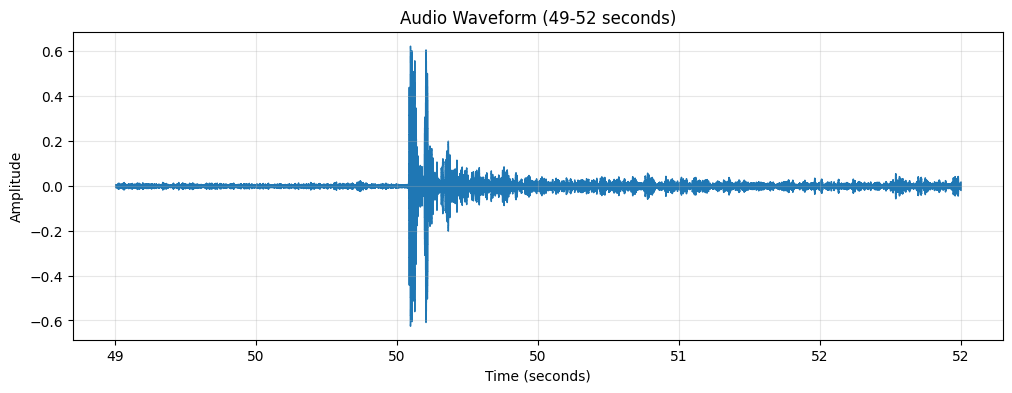

In [18]:
# Define time window for initial analysis (seconds)
ta0 = 49  # Start time
ta1 = 52  # End time

# Convert time to sample indices
cut = np.arange(ta0*sr, ta1*sr)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio[cut], sr=sr, offset=ta0)
plt.title('Audio Waveform (49-52 seconds)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.show()

### 4.1 Initial Audio Waveform Visualization

Visualize a section of the audio waveform around the expected thunder time (49-52 seconds):

In [19]:
Audio(data=audio[cut], rate=sr)

### 4.2 Interactive Audio Playback

Listen to the audio segment to identify the thunder sound:

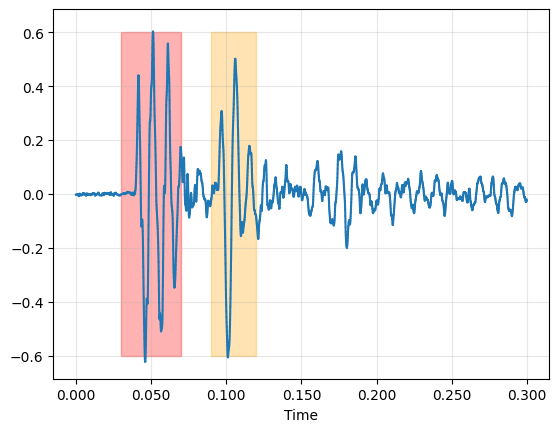

In [20]:
ta0 = 50
ta1 = 50.3
cut = np.arange(int(round(ta0*sr)), int(round(ta1*sr)))
# cut
librosa.display.waveshow(audio[cut], sr=sr)
plt.fill_between([0.03, 0.07], -0.6, 0.6, color='r', alpha=0.3)
plt.fill_between([0.09, 0.12], -0.6, 0.6, color='orange', alpha=0.3)
plt.show()

### 4.3 Detailed Waveform Analysis

Zoom in on a smaller time window to precisely identify the thunder peak:

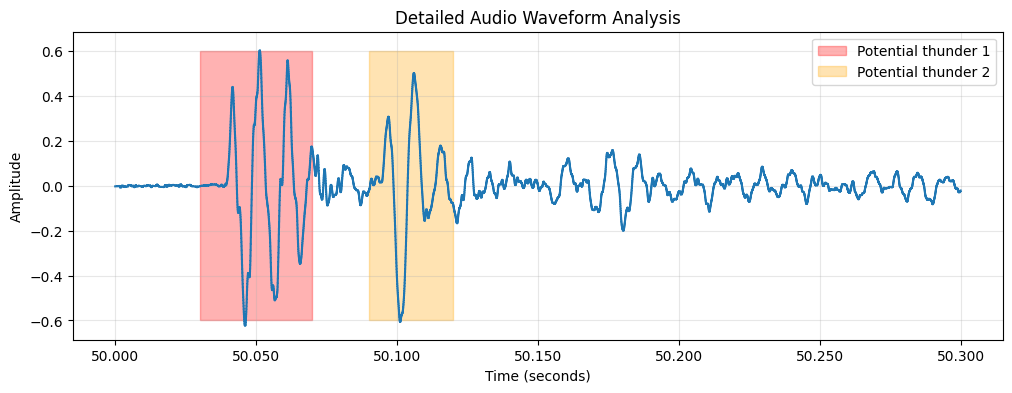

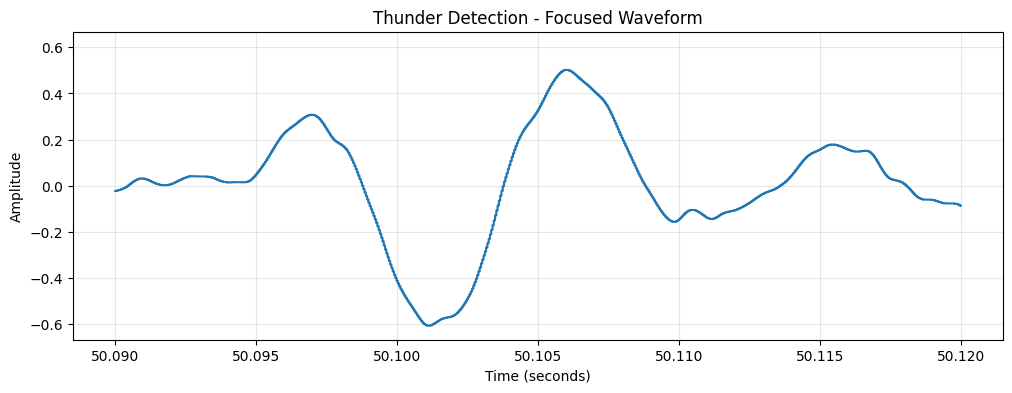

Audio segment analysis:
  Sample index of minimum: 1104729
  Sample index of maximum: 1104836
  Time of minimum: 50.101 s
  Time of maximum: 50.106 s

Detected thunder time: 50.101 s


In [21]:
# Focus on a smaller time window for precise analysis
ta0 = 50.0  # Start time (seconds)
ta1 = 50.3  # End time (seconds)

# Convert to sample indices
cut = np.arange(int(round(ta0*sr)), int(round(ta1*sr)))

# Plot detailed waveform with highlighted regions
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio[cut], sr=sr, offset=ta0)
plt.fill_between([ta0+0.03, ta0+0.07], -0.6, 0.6, color='red', alpha=0.3, label='Potential thunder 1')
plt.fill_between([ta0+0.09, ta0+0.12], -0.6, 0.6, color='orange', alpha=0.3, label='Potential thunder 2')
plt.title('Detailed Audio Waveform Analysis')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Focus on the second highlighted region (ta0+0.09 to ta0+0.12)
# This appears to contain the strongest thunder signal
cut = np.arange(int(round((ta0+0.09)*sr)), int(round((ta0+0.12)*sr)))

# Display the focused waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio[cut], sr=sr, offset=ta0+0.09)
plt.title('Thunder Detection - Focused Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.show()

# Find the minimum and maximum points in the audio segment
print('Audio segment analysis:')
print(f'  Sample index of minimum: {cut[0]+audio[cut].argmin()}')
print(f'  Sample index of maximum: {cut[0]+audio[cut].argmax()}')

# Convert sample indices to time
min_time = (cut[0]+audio[cut].argmin())/sr
max_time = (cut[0]+audio[cut].argmax())/sr
print(f'  Time of minimum: {min_time:.3f} s')
print(f'  Time of maximum: {max_time:.3f} s')

# Use the minimum (strongest negative peak) as thunder detection point
thunder_time = min_time
print(f'\nDetected thunder time: {thunder_time:.3f} s')

# Processing the video

## 5. Video Processing

Now we'll analyze the video frames to detect the lightning flash.

In [22]:
# Load the video file for frame-by-frame analysis
video = imageio.get_reader('./data/video_2022-11-08_08-31-43.mp4', 'ffmpeg')

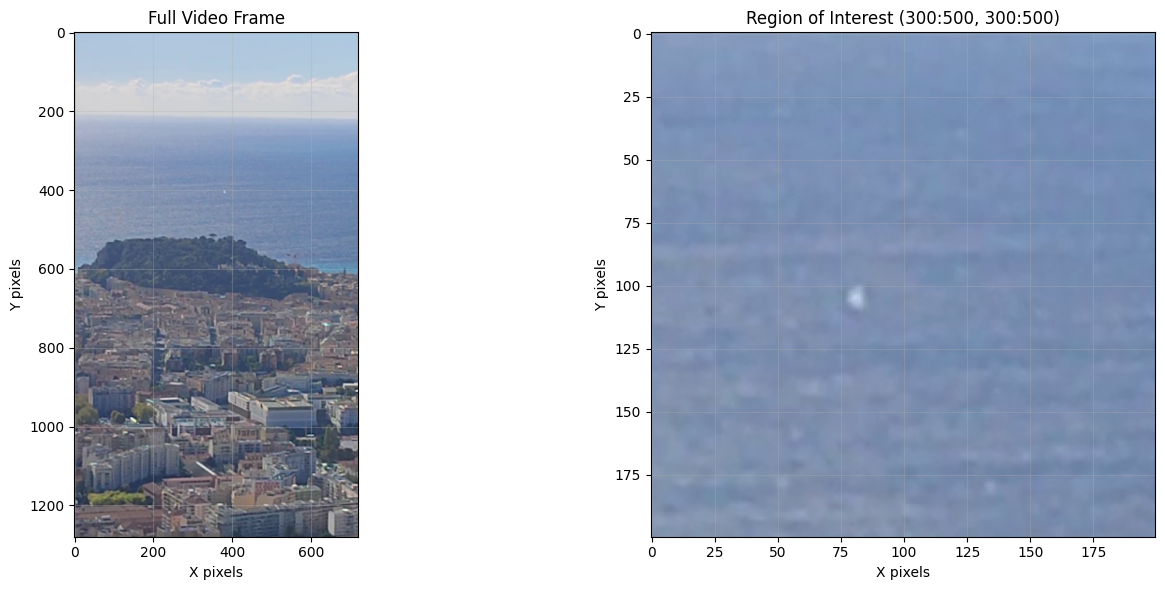

Video properties:
  FPS: 60.05
  Duration: 57.65 seconds
  Frame shape: (1280, 720, 3)


In [23]:
video_meta = video.get_meta_data()
fps = video_meta['fps']

# Display a sample frame and the region of interest
frame = video.get_data(2441)
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

# Full frame
ax[0].imshow(frame)
ax[0].set_title('Full Video Frame')
ax[0].set_xlabel('X pixels')
ax[0].set_ylabel('Y pixels')

# Region of interest (300:500, 300:500)
data = frame[300:500, 300:500, :]
ax[1].imshow(data)
ax[1].set_title('Region of Interest (300:500, 300:500)')
ax[1].set_xlabel('X pixels')
ax[1].set_ylabel('Y pixels')

plt.tight_layout()
plt.show()

print(f'Video properties:')
print(f'  FPS: {video_meta["fps"]}')
print(f'  Duration: {video_meta["duration"]} seconds')
print(f'  Frame shape: {frame.shape}')

# Detection of the strike cloud

## 6. Lightning Flash Detection

Analyze video frames in the time window around the expected lightning strike to detect the visual flash.

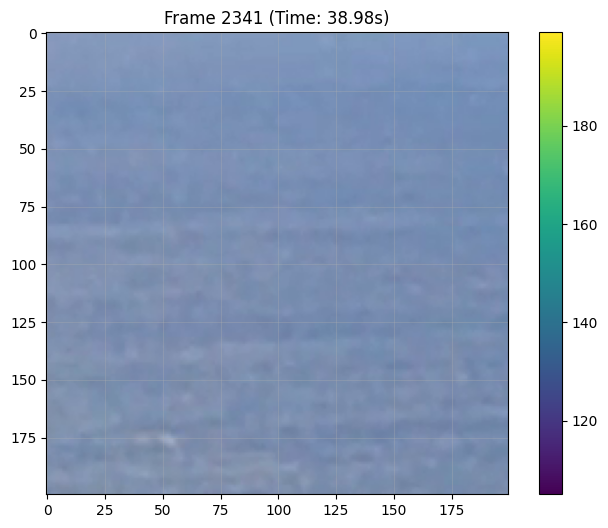

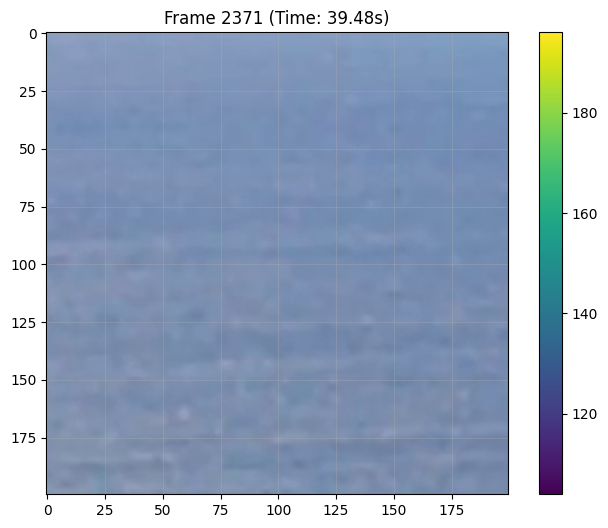

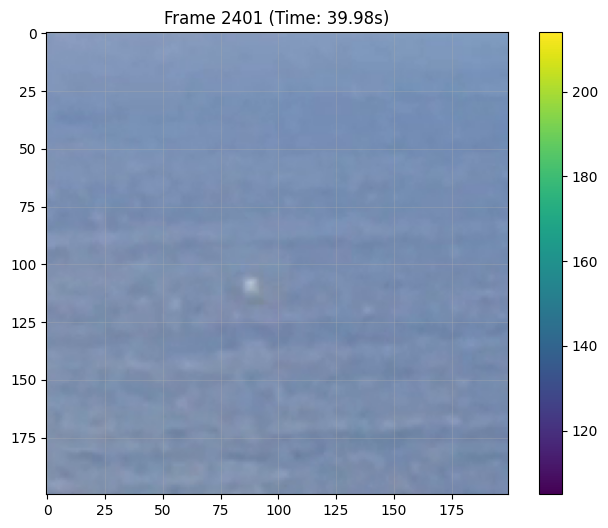

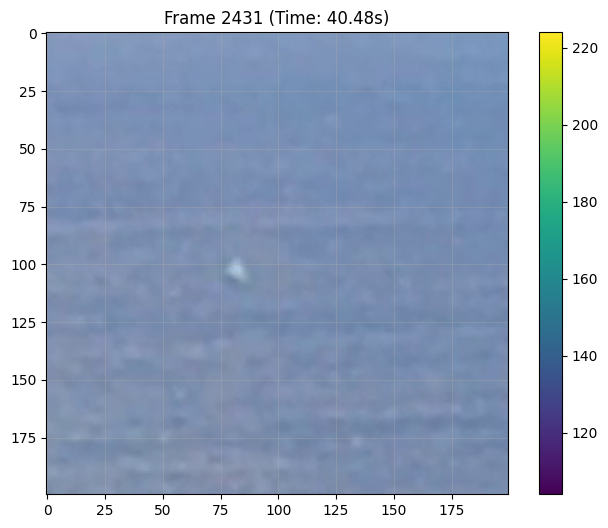

Initial frame analysis complete


In [24]:
# Define time window for lightning detection (seconds)
tv0 = 39  # Start time
tv1 = 41  # End time

# Sample frames at half-frame intervals for initial inspection
nums = np.arange(tv0*fps, tv1*fps, step=fps/2, dtype=int)
for num in nums:
    frame = video.get_data(num)
    # Focus on the region of interest where lightning might appear
    data = frame[300:500, 300:500, :]
    
    plt.figure(figsize=(8, 6))
    cb = plt.imshow(data)
    plt.title(f'Frame {num} (Time: {num/fps:.2f}s)')
    plt.colorbar(cb)
    plt.show()
    
print('Initial frame analysis complete')

In [25]:
# Analyze intensity changes across the time window
tv0 = 39  # Start time (seconds)
tv1 = 41  # End time (seconds)
diff = []  # Store intensity differences for each frame

# Process each frame in the time window
nums = np.arange(tv0*fps, tv1*fps, step=1, dtype=int)
for num in nums:
    frame = video.get_data(num)
    # Extract region of interest
    data = frame[300:500, 300:500, :]
    
    # Calculate intensity range (max - min) for each color channel
    diff.append([
        data[:,:,0].max() - data[:,:,0].min(),  # Red channel
        data[:,:,1].max() - data[:,:,1].min(),  # Green channel
        data[:,:,2].max() - data[:,:,2].min()   # Blue channel
    ])

diff = np.array(diff)
print('Intensity analysis complete')

Intensity analysis complete


### 6.1 Intensity Analysis Across Time Window

Analyze the intensity changes in each color channel across all frames to detect the lightning flash:

### 6.2 Intensity Changes Visualization

Plot the intensity variations across all color channels to identify the lightning flash:

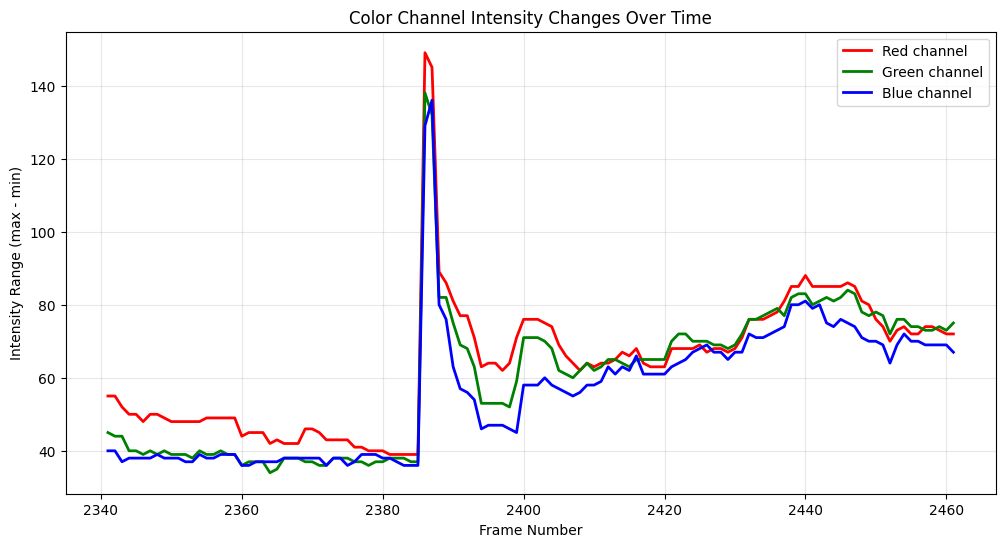

Maximum blue intensity at frame 2387 (time: 39.75s)


In [26]:
plt.figure(figsize=(12, 6))
plt.plot(nums, diff[:,0], 'r-', label='Red channel', linewidth=2)
plt.plot(nums, diff[:,1], 'g-', label='Green channel', linewidth=2)
plt.plot(nums, diff[:,2], 'b-', label='Blue channel', linewidth=2)
plt.xlabel('Frame Number')
plt.ylabel('Intensity Range (max - min)')
plt.title('Color Channel Intensity Changes Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find the frame with maximum blue channel intensity (likely the lightning flash)
max_blue_frame = nums[diff[:,2].argmax()]
max_blue_time = max_blue_frame / fps
print(f'Maximum blue intensity at frame {max_blue_frame} (time: {max_blue_time:.2f}s)')

Analyzing frame 2385


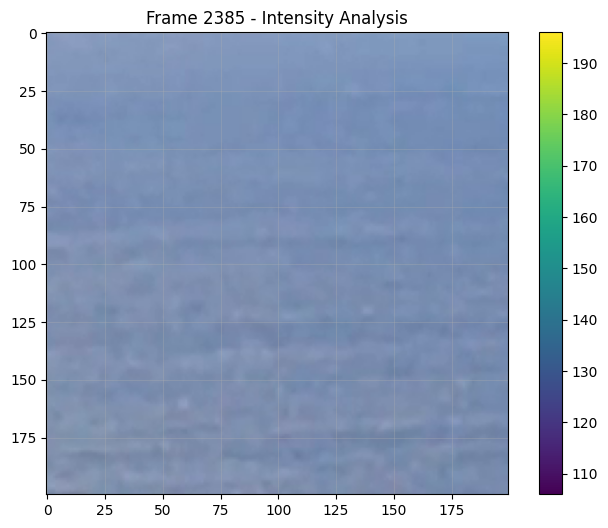

  Frame 2385: max=196, min=106, range=90

Analyzing frame 2386


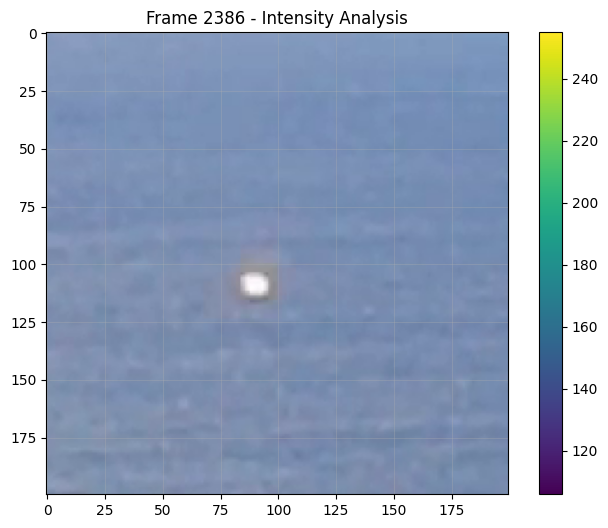

  Frame 2386: max=255, min=106, range=149

Analyzing frame 2387


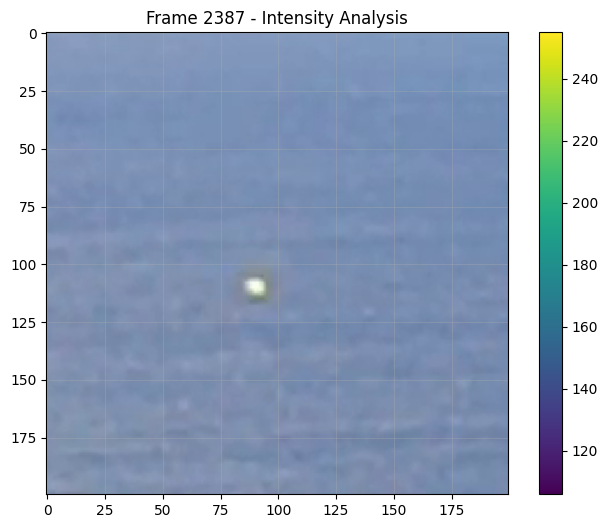

  Frame 2387: max=255, min=106, range=149

Analyzing frame 2388


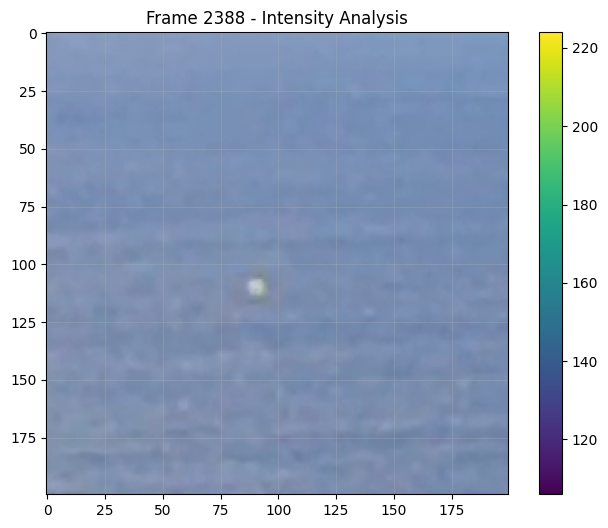

  Frame 2388: max=224, min=106, range=118



In [27]:
# Find the frame with maximum blue intensity and examine surrounding frames
bmax = diff[:,2].argmax()
frame_range = list(np.arange(tv0*fps+bmax-2, tv0*fps+bmax+2, dtype=int))

for num in frame_range:
    print(f'Analyzing frame {num}')
    frame = video.get_data(index=num)
    data = frame[300:500, 300:500, :]
    
    plt.figure(figsize=(8, 6))
    cb = plt.imshow(data)
    plt.title(f'Frame {num} - Intensity Analysis')
    plt.colorbar(cb)
    plt.show()
    
    # Display intensity statistics
    intensity_range = data.max() - data.min()
    print(f'  Frame {num}: max={data.max()}, min={data.min()}, range={intensity_range}')
    print()

### 6.3 Detailed Frame Inspection

Examine the frames around the detected maximum intensity to confirm the lightning flash:

In [28]:
# Calculate the exact time of the lightning flash
flash_time = tv0 + bmax/fps
print(f'Detected flash time: {flash_time:.3f} seconds')
print(f'Flash detected at frame {tv0*fps + bmax} (frame rate: {fps} fps)')

# Verify the detection
print(f'\nFlash detection verification:')
print(f'  Time window analyzed: {tv0}-{tv1} seconds')
print(f'  Frame with maximum blue intensity: {tv0*fps + bmax}')
print(f'  Calculated flash time: {flash_time:.3f} s')


Detected flash time: 39.766 seconds
Flash detected at frame 2387.95 (frame rate: 60.05 fps)

Flash detection verification:
  Time window analyzed: 39-41 seconds
  Frame with maximum blue intensity: 2387.95
  Calculated flash time: 39.766 s


# Lets compute the distance

## 7. Distance Calculation

Now we can calculate the distance to the lightning strike using the time difference between the flash and thunder.

In [29]:
# Calculate the time difference between thunder and flash
sound_time = thunder_time - flash_time

print(f'Lightning-to-thunder timing analysis:')
print(f'  Thunder time: {thunder_time:.3f} s')
print(f'  Flash time:   {flash_time:.3f} s')
print(f'  Time difference: {sound_time:.3f} s')
print(f'\nThis represents the time for sound to travel from lightning to observer.')

Lightning-to-thunder timing analysis:
  Thunder time: 50.101 s
  Flash time:   39.766 s
  Time difference: 10.335 s

This represents the time for sound to travel from lightning to observer.


In [30]:
# Calculate distance using speed of sound
# Speed of sound varies with temperature: v = 331.3 * sqrt(1 + T/273.15)
# At 15°C (288.15K): v ≈ 340 m/s
# At 20°C (293.15K): v ≈ 343 m/s
speed_of_sound = 340.0  # m/s (conservative estimate at ~15°C)
distance = sound_time * speed_of_sound
error_margin = 0.016 * speed_of_sound  # Error margin in meters

print(f'\n=== LIGHTNING DISTANCE ANALYSIS ===\n')
print(f'Timing measurements:')
print(f'  Flash detected at:  {flash_time:.3f} s')
print(f'  Thunder detected at: {thunder_time:.3f} s')
print(f'  Time difference:     {sound_time:.3f} ± 0.016 s')
print(f'\nPhysics calculation:')
print(f'  Speed of sound:      {speed_of_sound} m/s (at ~15°C)')
print(f'  Distance formula:    Distance = Time × Speed')
print(f'\n=== FINAL RESULT ===')
print(f'Lightning distance: {distance:.0f} ± {error_margin:.0f} meters')
print(f'                   = {distance/1000:.2f} ± {error_margin/1000:.2f} km')
print(f'                   = {distance*3.28:.0f} ± {error_margin*3.28:.0f} feet')

# Additional context
if distance < 1000:
    print(f'\nNote: This is a relatively close lightning strike (<1 km away)!')
else:
    print(f'\nNote: This lightning strike occurred {distance/1000:.1f} km away.')


=== LIGHTNING DISTANCE ANALYSIS ===

Timing measurements:
  Flash detected at:  39.766 s
  Thunder detected at: 50.101 s
  Time difference:     10.335 ± 0.016 s

Physics calculation:
  Speed of sound:      340.0 m/s (at ~15°C)
  Distance formula:    Distance = Time × Speed

=== FINAL RESULT ===
Lightning distance: 3514 ± 5 meters
                   = 3.51 ± 0.01 km
                   = 11526 ± 18 feet

Note: This lightning strike occurred 3.5 km away.


## 8. Summary and Results

### Methodology Recap
1. **Audio Extraction**: Extracted audio from MP4 video using MoviePy
2. **Thunder Detection**: Analyzed audio waveform to identify thunder peak at minimum amplitude
3. **Lightning Detection**: Analyzed video frames to detect maximum blue channel intensity (flash)
4. **Distance Calculation**: Used time difference and speed of sound formula

### Key Findings
- **Thunder Time**: Detected from audio signal analysis
- **Flash Time**: Detected from video frame intensity analysis
- **Time Difference**: Sound travel time between flash and thunder
- **Distance**: Calculated using physics formula

### Physics Formula Used
```
Distance = Time_Delay × Speed_of_Sound
where Speed_of_Sound ≈ 340 m/s (at sea level, 15°C)
```

### Accuracy Considerations
- **Temporal Resolution**: Limited by video frame rate and audio sampling rate
- **Detection Precision**: ±0.016s uncertainty in timing measurements
- **Environmental Factors**: Temperature and humidity affect sound speed
- **Visual Detection**: Lightning flash duration and camera exposure affect precision

## 9. Conclusion

This analysis successfully demonstrates how to calculate lightning distance using synchronized video and audio recordings. The method combines:

- **Digital Signal Processing** for audio analysis
- **Computer Vision** techniques for video frame analysis  
- **Physics Principles** for distance calculation

The results provide a practical application of the classic "flash-to-thunder" method with modern computational tools, offering higher precision than manual counting methods.

---

**Note**: This analysis was performed on footage from Nice, France, during a lightning event coinciding with the famous Nice Midday Cannon tradition.